In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

from sklearn_pandas import DataFrameMapper, cross_val_score
from pandas import DataFrame, read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#save the ID column
train_ID = train['Id']
test_ID = test['Id']

#Drop the ID column since it is unnecessary for the prediction process
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)


In [5]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 80
number of rows: 1460

Test data: 

number of columns:79
Number of columns:1459


In [14]:
LotFrontage_filter_OL = train.LotFrontage > 312

train_copy = train[~LotFrontage_filter_OL]

In [15]:
train_copy['LotFrontage'].describe()
#train['LotFrontage'].value_counts()




count    1199.000000
mean       69.644704
std        22.181762
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

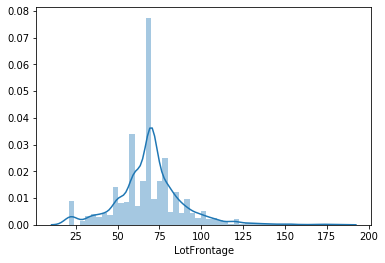

In [16]:
sns.distplot(train_copy['LotFrontage'].fillna(70))

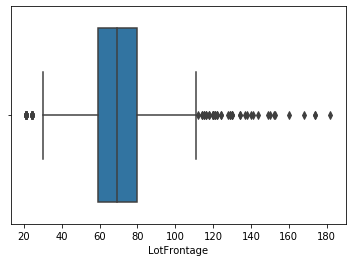

In [17]:
sns.boxplot(train_copy['LotFrontage'])

In [ ]:
#sns.distplot(train['LotFrontage'].fillna(70))

#sns.distplot(train['MasVnrArea'].fillna(103))
#sns.boxplot(train['LotFrontage'])

#sns.distplot(train['YearBuilt'])


LotArea

In [10]:
train['LotArea'].describe()
#train['LotArea'].value_counts()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [ ]:
#train['YearBuilt'].describe()
train['YearBuilt'].value_counts()

#train['GarageCars'].describe()
#train['GarageCars'].value_counts()

#train['GarageArea'].describe()
#train['GarageArea'].value_counts()

#train['PoolArea'].describe()
#train['PoolArea'].value_counts()

#train['Fireplaces'].describe()
#train['Fireplaces'].value_counts()

#train['TotRmsAbvGrd'].describe()
#train['TotRmsAbvGrd'].value_counts()




#train['EnclosedPorch'].describe()
#train['EnclosedPorch'].value_counts()

#train['3SsnPorch'].describe()
#train['3SsnPorch'].value_counts()

#train['ScreenPorch'].describe()
#train['ScreenPorch'].value_counts()

In [79]:
train['GarageYrBlt'].describe()
#train['MasVnrType'].value_counts()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [80]:
#train['LotFrontage'].describe()
train['GarageYrBlt'].value_counts()
#train['LotArea'].describe()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [71]:
train['MiscVal'].describe()



count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

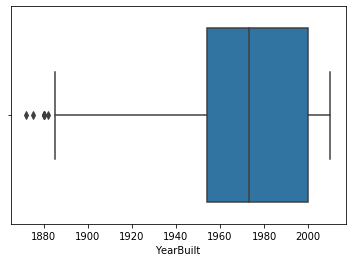

In [83]:
#sns.boxplot(train['LotFrontage'])
sns.boxplot(train['YearBuilt'])





In [43]:
#LotFrontage = [1952,2007]
#gd_year = gapm[gapm.year.isin(years)]
#gd_year.info()
#gapm.year.isin(years)
#gd_year

#Street: Type of road access to property

 #      Grvl	Gravel	
  #     Pave	Paved
   #    	
#Alley: Type of alley access to property

 #      Grvl	Gravel
  #     Pave	Paved
   #    NA 	No alley access
        
LotFrontage_filter_null = train.LotFrontage.isnull()
train_LotFrontage_filter_null_data = train[LotFrontage_filter_null]
#years_filter = gapm.year.isin(years)
#print(gapm[~country_filter & years_filter])
train_LotFrontage_filter_null_data.Alley.value_counts()
#train_LotFrontage_filter_null_data.Street.value_counts()




Grvl    3
Pave    2
Name: Alley, dtype: int64

In [56]:
LotArea_Filtr_data = train[train.LotArea > 100000]
LotArea_Filtr_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249          50       RL          NaN   159000   Pave   NaN      IR2   
313          20       RL        150.0   215245   Pave   NaN      IR3   
335         190       RL          NaN   164660   Grvl   NaN      IR1   
706          20       RL          NaN   115149   Pave   NaN      IR2   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
249         Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313         Low    AllPub    Inside       Sev       Timber       Norm   
335         HLS    AllPub    Corner       Sev       Timber       Norm   
706         Low    AllPub   CulDSac       Sev      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
249       Norm     1Fam     1.5Fin            6            7       1958   
313       Norm     1Fam     1Story            7            5       1965   
335       Norm   2fmCon     1.5Fin            5            6       1965   
706       Norm     1Fam     1Story            7            5       1971   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
249          2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313          1965       Hip  CompShg     BrkFace     BrkFace       None   
335          1965     Gable  CompShg     Plywood     Plywood       None   
706          2002     Gable  CompShg     Plywood     Plywood      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
249       472.0        Gd        TA     CBlock       Gd       TA           Gd   
313         0.0        TA        TA     CBlock       Gd       TA           Gd   
335         0.0        TA        TA     CBlock       TA       TA           Gd   
706       351.0        TA        TA     CBlock       Gd       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
249          Rec         697          Unf           0        747         1444   
313          ALQ        1236          Rec         820         80         2136   
335          ALQ        1249          BLQ         147        103         1499   
706          GLQ        1219          Unf           0        424         1643   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
249    GasA        Gd          Y      SBrkr      1444       700             0   
313    GasW        TA          Y      SBrkr      2036         0             0   
335    GasA        Ex          Y      SBrkr      1619       167             0   
706    GasA        TA          Y      SBrkr      1824         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
249       2144             0             1         2         0             4   
313       2036             2             0         2         0             3   
335       1786             2             0         2         0             3   
706       1824             1             0         2         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
249             1          Gd             7        Typ           2   
313             1          TA             8        Typ           2   
335             1          TA             7        Typ           2   
706             1          Gd             5        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
249          TA     Attchd       1958.0          Fin           2         389   
313          Gd     Attchd       1965.0          RFn           2         513   
335          Gd     Attchd       1965.0          Fin           2         529   
706          TA     Attchd       1971.0          Unf           2         739   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
249         TA         TA          Y           0           98              

In [51]:
#LotFrontage = [1952,2007]
#gd_year = gapm[gapm.year.isin(years)]
#gd_year.info()
#gapm.year.isin(years)
#gd_year

#Street: Type of road access to property

 #      Grvl	Gravel	
  #     Pave	Paved
   #    	
#Alley: Type of alley access to property

 #      Grvl	Gravel
  #     Pave	Paved
   #    NA 	No alley access
        
Street_filter_Grvl = ['Grvl']
train_Street_filter_Grvl_data = train[train.Street.isin(Street_filter_Grvl)]
#years_filter = gapm.year.isin(years)
#print(gapm[~country_filter & years_filter])
train_Street_filter_Grvl_data
#train_LotFrontage_filter_null_data.Street.value_counts()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
52            90       RM        110.0     8472   Grvl   NaN      IR2   
335          190       RL          NaN   164660   Grvl   NaN      IR1   
582           90       RL         81.0    11841   Grvl   NaN      Reg   
812           20  C (all)         66.0     8712   Grvl   NaN      Reg   
1061          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1184          20       RL         50.0    35133   Grvl   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
52           Bnk    AllPub    Corner       Mod       IDOTRR       RRNn   
335          HLS    AllPub    Corner       Sev       Timber       Norm   
582          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
812          Bnk    AllPub    Inside       Mod       IDOTRR       Norm   
1061         Low    AllPub    Inside       Gtl       IDOTRR       Norm   
1184         Lvl    AllPub    Inside       Mod       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
52         Norm   Duplex     1Story            5            5       1963   
335        Norm   2fmCon     1.5Fin            5            6       1965   
582        Norm   Duplex     SFoyer            6            5       1990   
812        Norm     1Fam     1Story            5            5       1952   
1061       Norm     1Fam     1Story            3            4       1935   
1184       Norm     1Fam     1Story            5            4       1963   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
52            1963     Gable  CompShg     Wd Sdng     Wd Sdng       None   
335           1965     Gable  CompShg     Plywood     Plywood       None   
582           1990     Gable  CompShg     HdBoard     HdBoard    BrkFace   
812           1952       Hip  CompShg     Wd Sdng     Wd Sdng       None   
1061          1950     Gable  CompShg     MetalSd     MetalSd       None   
1184          1963       Hip  CompShg     MetalSd     MetalSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
52           0.0        Fa        TA     CBlock       Gd       TA   
335          0.0        TA        TA     CBlock       TA       TA   
582        104.0        TA        Gd     CBlock       Gd       TA   
812          0.0        Fa        TA     CBlock       TA       TA   
1061         0.0        Fa        TA     CBlock       TA       TA   
1184       226.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
52             Gd          LwQ         104          GLQ         712   
335            Gd          ALQ        1249          BLQ         147   
582            Av          GLQ         816          Unf           0   
812            Av          Unf           0          Unf           0   
1061           No          Unf           0          Unf           0   
1184           Gd          Rec        1159          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
52            0          816    GasA        TA          N      SBrkr   
335         103         1499    GasA        Ex          Y      SBrkr   
582           0          816    GasA        TA          Y      SBrkr   
812         540          540    GasA        TA          N      FuseA   
1061        894          894    GasA        TA          Y      SBrkr   
1184        413         1572    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
52         816         0             0        816             1             0   
335       1619       167             0       1786             2             0   
582        816         0             0        816             1             0   
812       1044         0             0       1044             0             0   
1061       894   

In [103]:
Y_train.info()

AttributeError: 'Series' object has no attribute 'info'

In [95]:
Y_train.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [102]:
print(Y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [108]:
#descriptive statistics summary
Y_train.describe()


count      1456.000000
mean     180605.766484
std       79274.640742
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


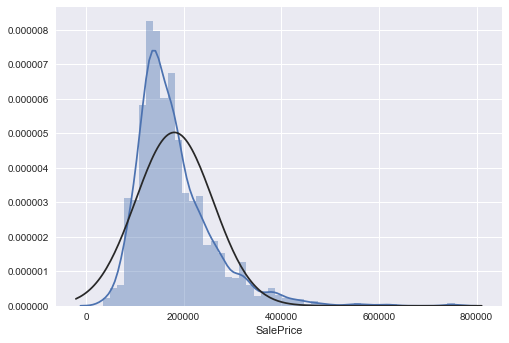

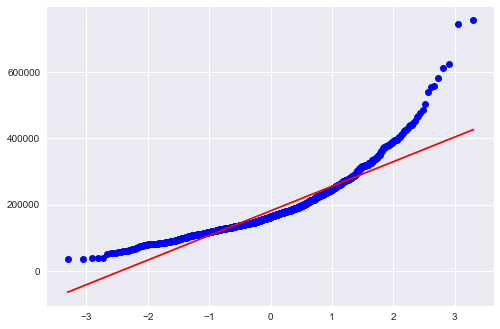

skewness: 1.882876
kurtosis: 6.536282


In [7]:
# kernel density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


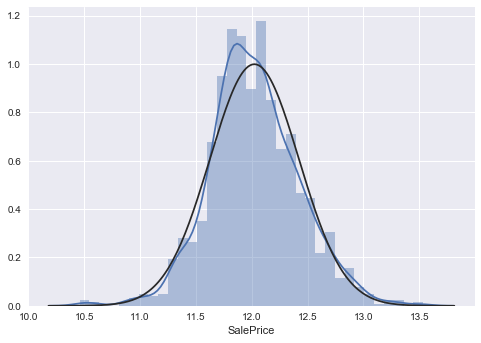

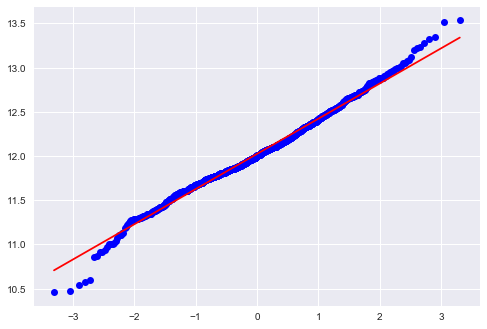

In [8]:
#log transform the target 
train["SalePrice"] = np.log1p(train["SalePrice"])

#Kernel Density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['SalePrice']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()


In [9]:
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

skewness: 0.121347
kurtosis: 0.809519


#### Exploring the variables

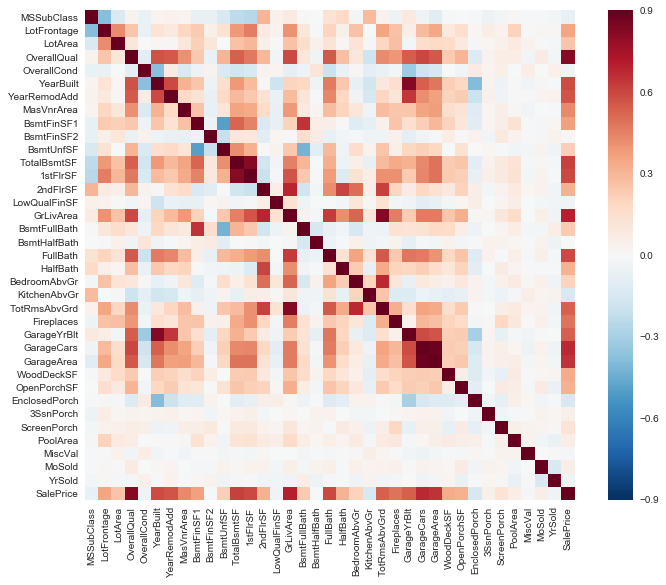

In [10]:
#correration matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

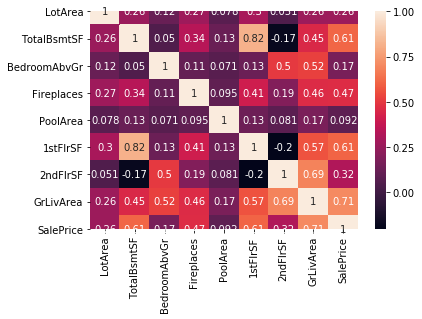

In [10]:
attributes = ['LotArea','TotalBsmtSF','BedroomAbvGr','Fireplaces','PoolArea','1stFlrSF','2ndFlrSF','GrLivArea','SalePrice']
sns.heatmap(train[attributes].corr(),annot=True)

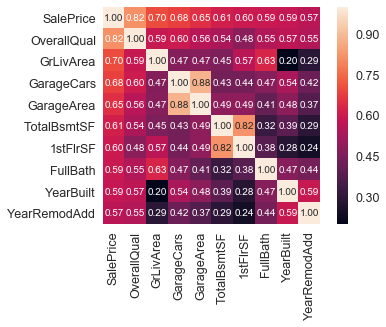

In [36]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

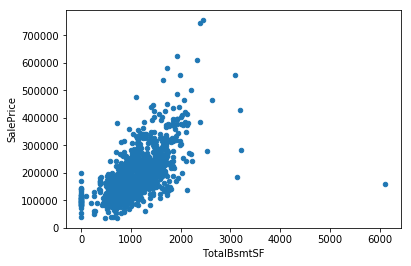

In [8]:
var ='TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000);
plt.show()

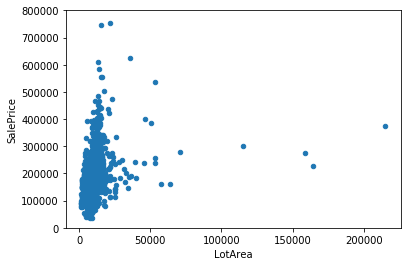

In [9]:
#scatter plot LotArea/salePrice
var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000));
plt.show();

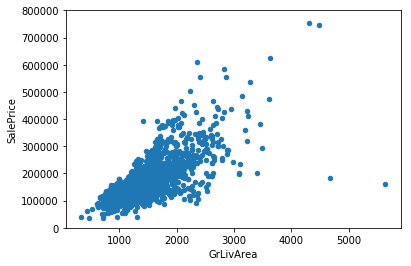

In [10]:
#scatter plot GrLivArea/salePrice
var ='GrLivArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

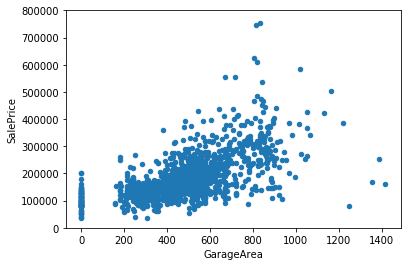

In [11]:
#scatter plot GarageArea/SalePrice
var = 'GarageArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

In [12]:
#Deleting Outliers of GrLivArea
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


### Relation exploration for categorical features

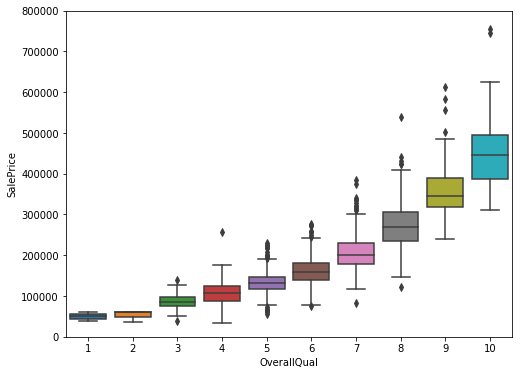

In [13]:
#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show();

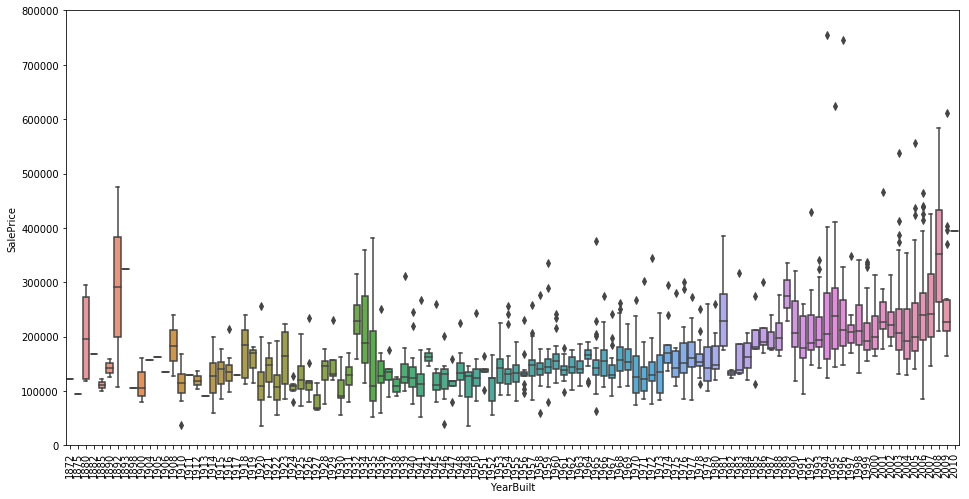

In [14]:
#year built
var  = 'YearBuilt'
data= pd.concat([train['SalePrice'], train[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();

### Inputing Missing Values

In [18]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal  12.247699  
1         NaN       0      5    2007        WD         Normal  12.109016  
2         NaN       0      9    2008        WD         Normal  12.317171  
3         NaN       0      2    2006        WD        Abnorml  11.849405  
4         NaN       0     12    2008        WD         Normal  12.429220  

[5 rows x 80 columns]

In [19]:
all_data = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

all_data size is: (2917, 79) 


Missing Raio
PoolQC           99.691464
MiscFeature      96.400411
Alley            93.212204
Fence            80.425094
FireplaceQu      48.680151
LotFrontage      16.660953
GarageFinish      5.450806
GarageYrBlt       5.450806
GarageQual        5.450806
GarageCond        5.450806
GarageType        5.382242
BsmtExposure      2.811107
BsmtCond          2.811107
BsmtQual          2.776826
BsmtFinType2      2.742544
BsmtFinType1      2.708262
MasVnrType        0.822763
MasVnrArea        0.788481
MSZoning          0.137127
BsmtFullBath      0.068564

### inputing missing values

###### Based on feature description provide, A feature that has NA means it is absent 

In [20]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [21]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))
    

##### Setting Mode values for missing entries

In [22]:
#msZoning classification: 'RL' is common
all_data ['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#functional: NA is typical
all_data["Functional"] = all_data["Functional"].fillna('Typ')

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual
all_data['KitchenQual'] =all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
all_data ['Exterior1st']= all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']= all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#sale type
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [23]:
#dropping as same value 'AllPub' for all records except 2NA and 1 'NoSeWa'
all_data = all_data.drop(['Utilities'], axis=1)

In [24]:
#Transforming required numerical features to categorical 
all_data['MSSubClass']= all_data['MSSubClass'].apply(str)
all_data['OverallCond'] =all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [25]:
#Label Encoding some categorical variables
#for information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
#shape
print('Shape all_data: {}'.format(all_data.shape))



Shape all_data: (2917, 78)


In [26]:
#add total surface area as TotalSf = basement + firstflr + secondflr
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [27]:
#log transform skewed numeric features 
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)                                              

                                 

\skew in numerical features: 



Skew
MiscVal       21.939672
PoolArea      17.688664
LotArea       13.109495
LowQualFinSF  12.084539
3SsnPorch     11.372080
LandSlope      4.973254
KitchenAbvGr   4.300550

#### Box cox transformation of highly skewed features


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to box cox transform


#### adding dummy categorical features


In [29]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [30]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.SalePrice.values
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

#### Linear regression Modeling
I will be implementing
1. Lasso Regression
2. Gradient Boosting Regression 

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



In [32]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)


In [33]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')



###### scores from the above models


In [34]:
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.1115 (0.0074)


 GBoost score: 0.1167 (0.0084)




#### stacking the models 

###### averaging base model


In [35]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1089 (0.0078)



In [36]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [37]:
#final training and prediction of the stacked regressor

averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train.values, y_train)

RMSLE score on the train data:
0.0697080501374
Accuracy score:


0.96956539495464311

In [39]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['id'] = test_ID
submit['SalePrice'] = ensemble
submit.to_csv('submission.csv', index = False)
submit.head()

id      SalePrice
0  1461  121425.132538
1  1462  155609.339337
2  1463  191357.011599
3  1464  196858.153749
4  1465  189899.163028